In [ ]:
# Import necessary libraries
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer

# Define the state-to-note mapping for a simple musical scale (e.g., Do Major)
note_mapping = {
    'Do': 261.63,
    'Re': 293.66,
    'Mi': 329.63,
    'Fa': 349.23,
    'Sol': 392.00,
    'La': 440.00,
    'Si': 493.88,
    'Do_high': 523.25
}

# Step 1: Create a 3-qubit quantum circuit
circuit = QuantumCircuit(3, 3)

# Step 2: Apply Hadamard gates to each qubit to create superposition
circuit.h(0)
circuit.h(1)
circuit.h(2)

# Step 3: Measure each qubit to get a 3-bit output
circuit.measure([0, 1, 2], [0, 1, 2])

# Step 4: Choose the Aer simulator as the backend
simulator = Aer.get_backend("qasm_simulator")

# Step 5: Transpile the circuit for the simulator
transpiled_circuit = transpile(circuit, simulator)

# Step 6: Run the transpiled circuit on the simulator
job = simulator.run(transpiled_circuit, shots=1000)
result = job.result()

# Step 7: Get the measurement results
counts = result.get_counts()
print("Measurement Results:", counts)

# Step 8: Map the quantum states (measurement results) to musical notes
notes = [note_mapping[state] for state in counts.keys()]
print("Generated Notes:", notes)


Measurement Results: {'101': 8, '111': 14, '011': 8, '001': 14, '110': 14, '010': 15, '000': 11, '100': 16}
Generated Notes: ['A', 'C_high', 'F', 'D', 'B', 'E', 'C', 'G']


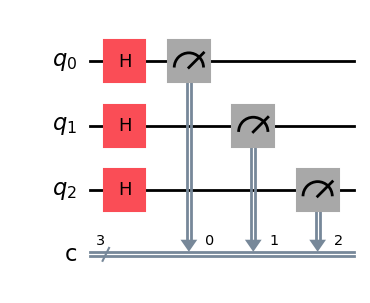

In [2]:
# Draw the circuit
circuit.draw("mpl")

In [ ]:
# Define frequencies for each note in Do Major scale
note_frequencies = {
    'Do': 261.63,
    'Re': 293.66,
    'Mi': 329.63,
    'Fa': 349.23,
    'Sol': 392.00,
    'La': 440.00,
    'Si': 493.88,
    'Do_high': 523.25
}

In [ ]:
from pydub import AudioSegment
from pydub.generators import Sine

# Set duration for each note (in milliseconds)
note_duration = 100  # half a second for each note

# Create an empty audio segment
audio = AudioSegment.silent(duration=0)

# Generate audio for each note and append it
for note in notes:
    frequency = note_frequencies[note]
    # Create a sine wave for the current note
    sine_wave = Sine(frequency).to_audio_segment(duration=note_duration)
    audio += sine_wave

# Save the generated music to an audio file
audio.export("quantum_music.wav", format="wav")
print("Audio file 'quantum_music.wav' generated!")


Audio file 'quantum_music.wav' generated!


In [5]:
from qiskit.circuit import Parameter

# Define a parameterized angle
theta = Parameter('θ')

# Apply rotation gates with parameters
circuit.rx(theta, 0)
circuit.ry(theta, 1)
circuit.rz(theta, 2)

# Bind the parameter to a specific value before execution
circuit = circuit.assign_parameters({theta: np.pi / 4})


In [6]:
# Example: User-defined parameters
user_scale = input("Choose a scale (e.g., 'C Major', 'G Minor'): ")
note_duration = int(input("Enter duration of each note (in ms): "))


Choose a scale (e.g., 'C Major', 'G Minor'):  C Major
Enter duration of each note (in ms):  200


In [7]:
import random
from pydub import AudioSegment

# Randomly insert rests
for note in notes:
    if random.random() < 0.2:  # 20% chance of rest
        audio += AudioSegment.silent(duration=note_duration)
    else:
        frequency = note_frequencies[note]
        sine_wave = Sine(frequency).to_audio_segment(duration=note_duration)
        audio += sine_wave


In [8]:
sine_wave = Sine(frequency).to_audio_segment(duration=note_duration)
sine_wave = sine_wave.fade_in(50).fade_out(50)  # Apply fade in/out


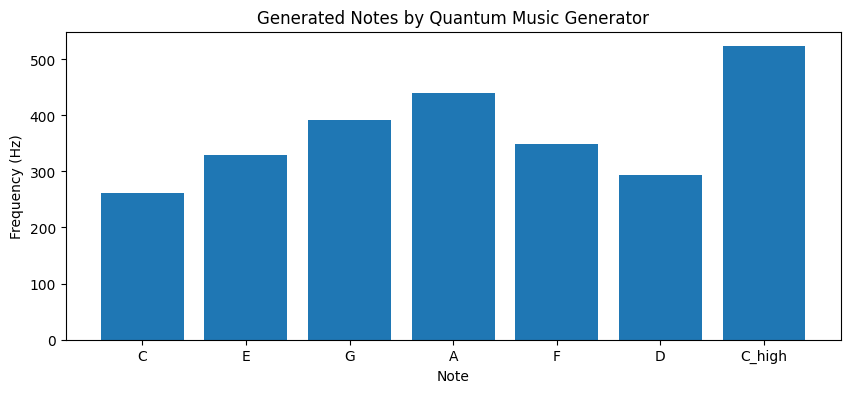

In [9]:
import matplotlib.pyplot as plt

# Plot notes on a simple bar chart
note_names = list(note_frequencies.keys())
note_values = [note_frequencies[note] for note in notes]

plt.figure(figsize=(10, 4))
plt.bar(range(len(notes)), note_values, tick_label=notes)
plt.title("Generated Notes by Quantum Music Generator")
plt.xlabel("Note")
plt.ylabel("Frequency (Hz)")
plt.show()


In [10]:
# Save the generated music to a new .wav file
audio.export("refined_quantum_music.wav", format="wav")
print("Audio file 'refined_quantum_music.wav' generated!")

Audio file 'refined_quantum_music.wav' generated!
